## Tanzania Water Wells.



# Overview
## Business Understanding

Tanzania is known to be a well developing nation with a population of approximaltely 60 milion people.Millions of people in Tanzania, struggle to get clean water and are forced to cover very long distances in search of clean water. Wells are the main source of water for most Tanzanians,however many are broken or in bad shape. This shortage of water is a major issue as water is an essential in various sectors,leading to poor health,slow economic growth and hindered productivity.
This projects with the use of machine learning tools aims at identifying why some wells fail,predict whether the new wells will work . 

# . Challenges .
1. The population of some areas is relatively high as compared to access of water.
2. Poor water quality resulting to diseases.
3. Insufficient funding for the maintainance and also development.
4. Climate change


##  Problem Statement

Water shortage is a crucial problem in Tanzania and this arises majorly from the maintenance of wells.Maintaning these water sources is also a challenge maybe because of water quality,geographical location,infrastracture upkeep and many other factors. Some are non-functonal while others are partially functional.This may limit the local citizens from accessing clean water.
Challenges faced include: Health and sanitation issues,Poor economic growth and hindered productivity.

Our project here aims to help those who are in charge of water be it governmeantal ,non-governmental organisations and maybe policymakers to make improved or better decisions that would help in improvement of the functionality and maintenance of water wells in the country.

## 1.3 Objective

The objective of our project is come up with a prdeictive model that will determine functionality of water wells accurately.Using the data provided and making use of our knowledge in data science, our project focuses on addressing the challenge of the non-funcionality of the wells,improving access to clean water for the people.
Focus of our project is:
1. Identifying key factors that may contribute to functionality of waterwells in Tanzania.
2. Developing a predictive model that can predict functionality of water wells based on attributes such as geographical location,infrastracture and water quality.
3. Enable data-driven decision making.
4. provide recommendations that can boost on the efforts for maintenance

## Specific Objectives
1. determine if functionality of the wells varies on quantity.
2. Identify the most popular water point type.
3. Determine whether the status of functionality is related to the payment type.


##  Main objective

Build a classifier model that will determine functionality of waterwells accurately.

## Success Metrics
Provide 70 % and above accuracy on wells functionality.

## Data Understanding

We start by describing our data.


## Data Sources

Got this data provided from Taarifa and the Tanzanian Ministry of Water.It is organized into three separate CSV files: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

1. Test Set Values
2. Training Set Labels
3. Training Set Values

The labels in this dataset
The labels in this dataset are simple. There are three possible values:

1. functional - the waterpoint is operational and there are no repairs needed

2. functional needs repair - the waterpoint is operational, but needs repairs
3. non functional - the waterpoint is not operational

The predictor variables in this data include:

1.  amount_tsh - Total static head (amount water available to wterpoint)
2. date_recorded - The date the row was entered
3. funder - Who funded the well
4. gps_height - Altitude of the well
5. installer - Organization that installed the well
6. longitude - GPS coordinate
7. latitude - GPS coordinate
8. wpt_name - Name of the waterpoint if there is one
9. num_private - Number of households with private access to the well
10. basin - Geographic water basin
11. subvillage - Geographic location
12. region - Geographic location
13. region_code - Geographic location 
14. district_code - Geographic location 
15. lga - Geographic location
16. ward - Geographic location
17. population - Population around the well
18. public_meeting - True/False
19. recorded_by - Group entering this row of data
20. scheme_management - Who operates the waterpoint
21. scheme_name - Who operates the waterpoint
22. permit - If the waterpoint is permitted
23. construction_year - Year the waterpoint was constructed
24. extraction_type - The kind of extraction the waterpoint uses
25. extraction_type_group - The kind of extraction the waterpoint uses
26. extraction_type_class - The kind of extraction the waterpoint uses
27. management - How the waterpoint is managed
28. management_group - How the waterpoint is managed
29. payment - What the water costs
30. payment_type - What the water costs
31. water_quality - The quality of the water
32. quality_group - The quality of the water
33. quantity - The quantity of water
34. quantity_group - The quantity of water
35. source - The source of the water
36. source_type - The source of the water
37. source_class - The source of the water
38. waterpoint_type - The kind of waterpoint
39. waterpoint_type_group - The kind of waterpoint


Since we have described our data already,we will go ahead and import the relevant libraries and load our data.

In [70]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

We are going to go ahead and load our datasets 

In [71]:
# Loading the datasets
training_data = pd.read_csv("Training_Set_values.csv")
testing_data = pd.read_csv("Test_set.csv")
training_labels = pd.read_csv("Training_Set_labels.csv")


In [72]:
# concatenating train_labels and data
train_df = pd.concat([training_data, training_labels],axis=1)

# merging the data sets
train_df = training_data.merge(training_labels, how = "inner")

print(train_df)



          id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none    

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [74]:
# Getting the data types of the data
train_df.dtypes.value_counts()

object     31
int64       7
float64     3
dtype: int64

In [75]:
#function to check on the dataset shape, column names 
def check_dataset(train_df):
    
    # Output the shape of the dataset
    print("Shape of dataset:", train_df.shape)
    
    # Output the column names of the dataset
    print("Column names:", list(train_df.columns))

check_dataset(train_df)

Shape of dataset: (59400, 41)
Column names: ['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


## Data Preparation

In [76]:
class DataCleaner:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_duplicates(self):
        # Returns a boolean Series.
        duplicated = self.dataframe[self.dataframe.duplicated()]
        if not duplicated.empty:
            print("Found duplicated rows:")
            print(duplicated)
        else:
            print("No duplicated rows found.")
        return duplicated

    def drop_duplicates(self):
        self.dataframe = self.dataframe.drop_duplicates().reset_index(drop=True)
        print("Duplicated rows dropped.")
        return self.dataframe


df = pd.DataFrame(train_df)
cleaner = DataCleaner(df)

# Check for duplicates
duplicates = cleaner.check_duplicates()

# Drop duplicates
cleaned_df = cleaner.drop_duplicates()

print("Cleaned DataFrame:")
print(cleaned_df)

# Loading the large dataset (same as before)


No duplicated rows found.
Duplicated rows dropped.
Cleaned DataFrame:
          id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private 

The DataCleaner class is defined and it contains methods to check for and remove duplicate rows from dataframe.

We create a large dataset with multiple columns.
From the output we see that we had duplicated rows and we ares shown how our cleaned dataframe looked like after we dropped duplicates. and then checked for the duplicates again and none were found.

## Checking for missing values and handling them

In [77]:
class DataCleaner:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def replace_missing_with_mode(self):
        """
        Replaces missing values in the DataFrame with the mode of each column.

        Returns:
            DataFrame: A DataFrame with missing values replaced by the mode.
        """
        for column in self.dataframe.columns:
            if self.dataframe[column].isnull().any():
                mode_value = self.dataframe[column].mode()[0]
                self.dataframe[column].fillna(mode_value, inplace=True)
                print(f"Missing values in column '{column}' replaced with mode: {mode_value}.")
        return self.dataframe

df = pd.DataFrame(train_df)
handler = DataCleaner(train_df)

# Replace missing values with mode (after method definition)
df_mode = handler.replace_missing_with_mode()
print("DataFrame after replacing missing values with mode:")
print(df_mode)


Missing values in column 'funder' replaced with mode: Government Of Tanzania.
Missing values in column 'installer' replaced with mode: DWE.
Missing values in column 'subvillage' replaced with mode: Madukani.
Missing values in column 'public_meeting' replaced with mode: True.
Missing values in column 'scheme_management' replaced with mode: VWC.
Missing values in column 'scheme_name' replaced with mode: K.
Missing values in column 'permit' replaced with mode: True.
DataFrame after replacing missing values with mode:
          id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...

We checked for missing values and found some that were shown in the columns above which were replaced by the mode using fillna method.

Some columns here need to be converted to categorical

In [78]:
df_mode.info

<bound method DataFrame.info of           id  amount_tsh date_recorded                  funder  gps_height  \
0      69572      6000.0    2011-03-14                   Roman        1390   
1       8776         0.0    2013-03-06                 Grumeti        1399   
2      34310        25.0    2013-02-25            Lottery Club         686   
3      67743         0.0    2013-01-28                  Unicef         263   
4      19728         0.0    2011-07-13             Action In A           0   
...      ...         ...           ...                     ...         ...   
59395  60739        10.0    2013-05-03         Germany Republi        1210   
59396  27263      4700.0    2011-05-07             Cefa-njombe        1212   
59397  37057         0.0    2011-04-11  Government Of Tanzania           0   
59398  31282         0.0    2011-03-08                   Malec           0   
59399  26348         0.0    2011-03-23              World Bank         191   

          installer  longitude 

In [79]:
#Converting some columns into categorical
for col in ['basin','region','region_code','district_code','public_meeting','recorded_by','scheme_management','payment_type','water_quality','quantity','source','waterpoint_type']:
    df_mode[col] = df_mode[col].astype('category')

print(df_mode.dtypes)


id                          int64
amount_tsh                float64
date_recorded              object
funder                     object
gps_height                  int64
installer                  object
longitude                 float64
latitude                  float64
wpt_name                   object
num_private                 int64
basin                    category
subvillage                 object
region                   category
region_code              category
district_code            category
lga                        object
ward                       object
population                  int64
public_meeting           category
recorded_by              category
scheme_management        category
scheme_name                object
permit                       bool
construction_year           int64
extraction_type            object
extraction_type_group      object
extraction_type_class      object
management                 object
management_group           object
payment       

We chose to convert specific columns into categorical due to nature of the data and the modelling taks we plan to perform.

In [80]:
columns_to_drop = ['id', 'num_private', 'recorded_by']  # List columns you want to drop

df_mode.drop(columns=columns_to_drop, inplace=True)


## Explanatory Data Analysis

In EDA, we delve into a deeper understanding of the dataset gining insights from the content and also its structures through visualizations,and exploration techniques.

### Univariate Analysis

We will start by finding the number of unique funders for the project and the call a function to display the top 12 funders.

In [81]:
U_funders = df_mode['funder'].nunique()
print("There are {} unique values of funders".format(U_funders))


There are 1897 unique values of funders


In [82]:
def display_top_funders(data, n=15):
    top_funders = df_mode['funder'].value_counts().head(n)
    print(f"Top {n} Funders:")
    print(top_funders)


display_top_funders(df_mode, n=12)


Top 12 Funders:
Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Name: funder, dtype: int64


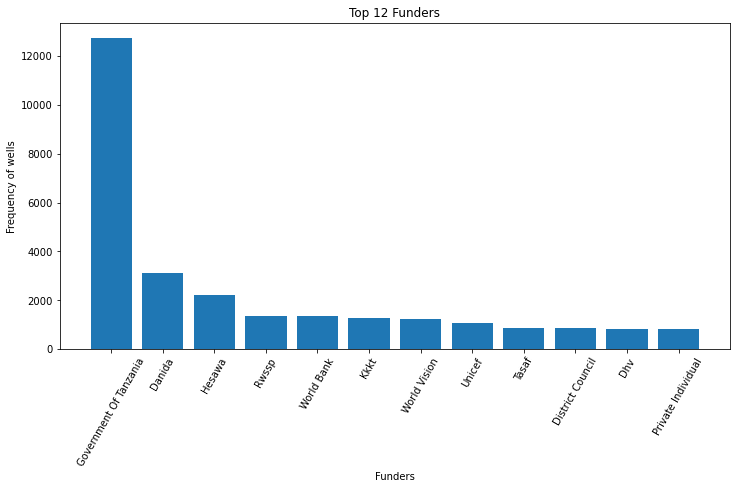

In [83]:
# Now plot the top twelve funders for thewells.

def display_funders(data, n=12):
    funders = df_mode['funder'].value_counts().head(n)

    # Plot the  funders
    plt.figure(figsize=(12, 6))
    plt.bar(top_funders.index, top_funders.values)
    plt.title('Top 12 Funders')
    plt.xlabel('Funders')
    plt.ylabel('Frequency of wells')
    plt.xticks(rotation=60)
    plt.show()

    return funders


funders = display_funders(df_mode, n=12)

It is evident that the government of Tanzania is the biggest funder,seconded by Danida and rthen the rest follow.

We will go ahead and for the number of unique well installers.

In [84]:
# Assuming df_mode is already defined
unique_installers = df_mode['installer'].nunique()
print("There are {} unique values of installers".format(unique_installers))


There are 2145 unique values of installers


In [85]:

data = {'installer': ['Roman', 'Grumeti', 'World vision', 'UNICEF', 'Artisan', 'CES', 'Cefa', None, 'Musa', 'World Bank', 'Roman', 'Grumeti', 'World vision', 'UNICEF', 'Artisan', 'CES', 'Cefa', None, 'Musa', 'World Bank']}
df = pd.DataFrame(data)

# Get the value counts for the 'installer' column
installer_counts = df['installer'].value_counts()

# Print the sum of the value counts
print(installer_counts.sum())


18


Given 18 then that means the None was nit counted so will introduce a code that will cater for None.

In [86]:
# Check for missing values (None) in the 'installer' column
missing_values = df['installer'].isnull().sum()
print(f"Number of missing values (None): {missing_values}")
#instead of excluding 'None' from the count, we will then replace ut with another value

  
  # Option 2: Replace None with a different value
df['installer'] = df['installer'].fillna('Unknown')
installer_counts = df['installer'].value_counts()
print(f"Total installers (including replaced None): {installer_counts.sum()}")


Number of missing values (None): 2
Total installers (including replaced None): 20


In [87]:
#Display the ten top installers
top_installers = df_mode ['installer'].value_counts().head(10)
print(top_installers)

DWE                   21057
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64


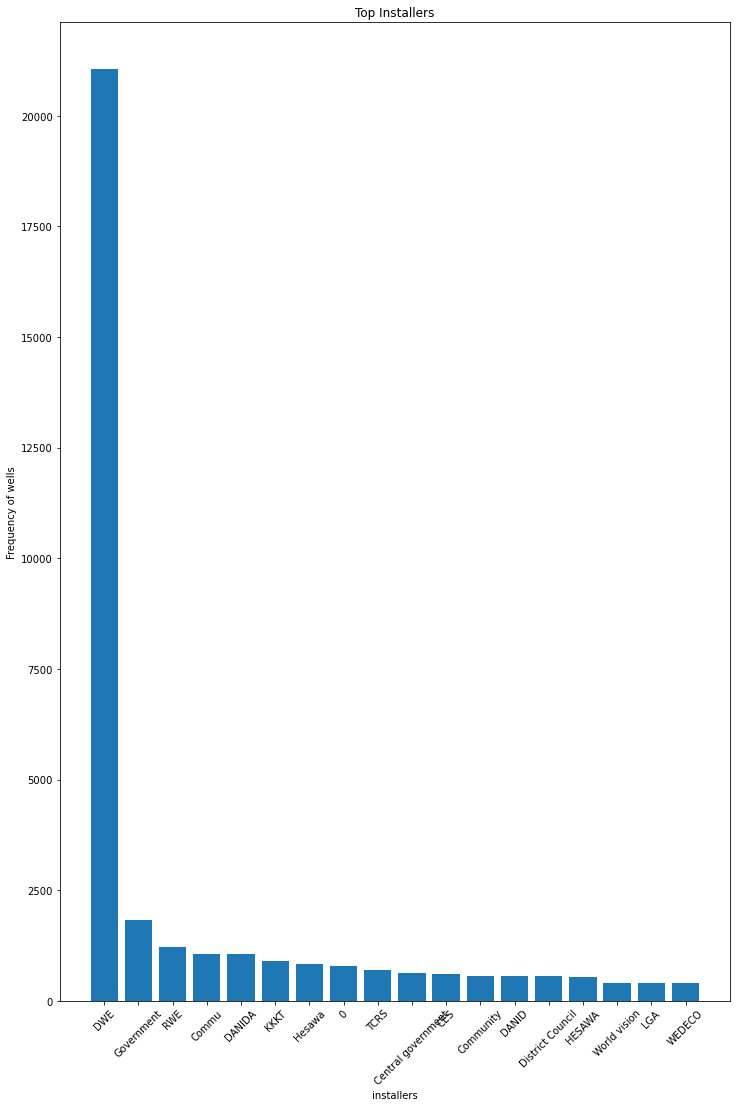

In [88]:
# Now plot the top installers for the wells.

def display_installers(data, n=18):
    top_installers = df_mode['installer'].value_counts().head(n)

    # Plot the  funders
    plt.figure(figsize=(12, 18))
    plt.bar(top_installers.index, top_installers.values)
    plt.title('Top Installers')
    plt.xlabel('installers')
    plt.ylabel('Frequency of wells')
    plt.xticks(rotation=45)
    plt.show()

    return top_installers


funders = display_installers(df_mode, n=18)

From the graphical representation above, we see that the top installer is DWE, seconded by the goverment and then the rest follow.

## Year of construction of wells.

In [89]:
df_mode['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

The output listed shows the number of constructions done in various years but since 0 is invalid year then it is likely to be the place holder of missing values but we will not drop it,or even convert it into mdeian because it has majority of the dataset .We will have to use it as a new value.

We shall create a new column and we will not alter with the original data.

In [90]:
data = {
    'amount_tsh': [0, 10, 20],
    'gps_height': [10, 20, 30],
    'longitude': [35.0, 36.0, 37.0],
    'latitude': [-10.0, -9.0, -8.0],
    'population': [100, 200, 300],
    'age': [5, 10, 15],  # Add more features as needed
    'region': ['A', 'B', 'A'],
    'installer': ['Installer1', 'Installer2', 'Installer1'],
    'construction_year': [0, 2010, 0]
}
df = pd.DataFrame(data)

# Create a new column 'construction_year_missing' to flag the missing years
df['construction_year_missing'] = df['construction_year'] == 0

# Display the updated DataFrame
print(df)


   amount_tsh  gps_height  longitude  latitude  population  age region  \
0           0          10       35.0     -10.0         100    5      A   
1          10          20       36.0      -9.0         200   10      B   
2          20          30       37.0      -8.0         300   15      A   

    installer  construction_year  construction_year_missing  
0  Installer1                  0                       True  
1  Installer2               2010                      False  
2  Installer1                  0                       True  


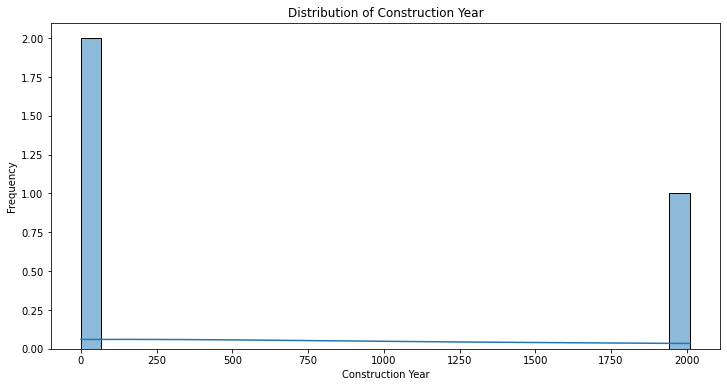

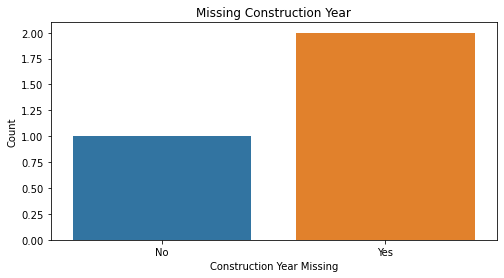

In [91]:
# Plotting the construction_year distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['construction_year'], bins=30, kde=True)
plt.title('Distribution of Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.show()

# Plotting the construction_year_missing column
plt.figure(figsize=(8, 4))
sns.countplot(x='construction_year_missing', data=df)
plt.title('Missing Construction Year')
plt.xlabel('Construction Year Missing')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Came up with two graphical representations of both the construction year and the missing construction year.

### Population
Let us take a look at the population so that we can compare with functionality of the wells and know whether it is a factor.

In [92]:
df_mode['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [94]:
df_mode.loc[df_mode['population']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [97]:
pop = df_mode['population'].describe()
print("Total number of people around the wells is",pop[0])
print("\n")
print("The average number of people living around the wells is",pop[1])
print("\n")
print("The minimum population value is",pop[3])
print("\n")
print("The maximum population value is",pop[7])

Total number of people around the wells is 59400.0


The average number of people living around the wells is 179.90998316498317


The minimum population value is 0.0


The maximum population value is 30500.0


### Water Quality.

In [98]:
df_mode['water_quality'].value_counts()


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

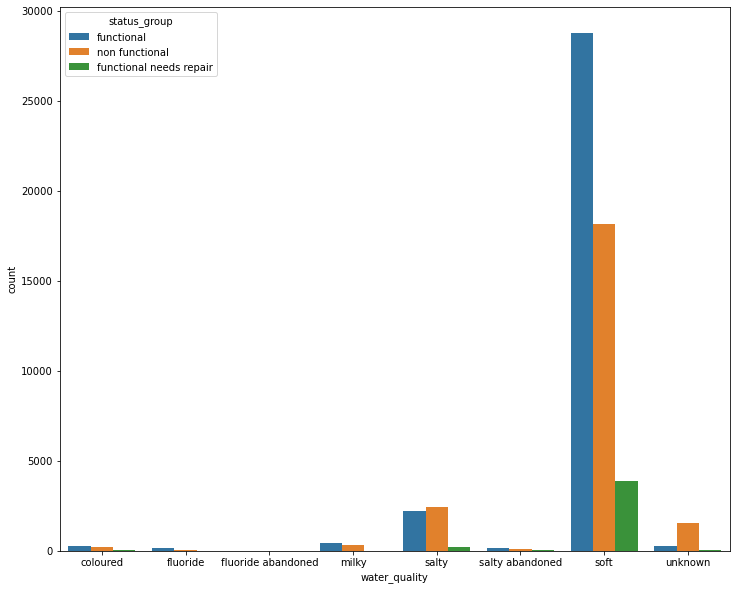

In [99]:

plt.figure(figsize=(12,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df_mode)

OR

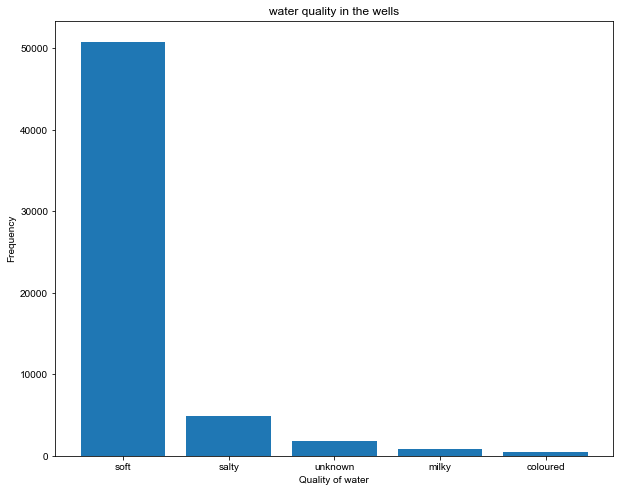

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
quality_count = train_df["water_quality"].value_counts().sort_values(ascending=False).head(5)
plt.bar(quality_count.index, quality_count.values)
plt.xlabel("Quality of water")
plt.ylabel("Frequency")
plt.title("water quality in the wells")
sns.set_style("darkgrid")
plt.show()

### Quantity

In [100]:
df_mode['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

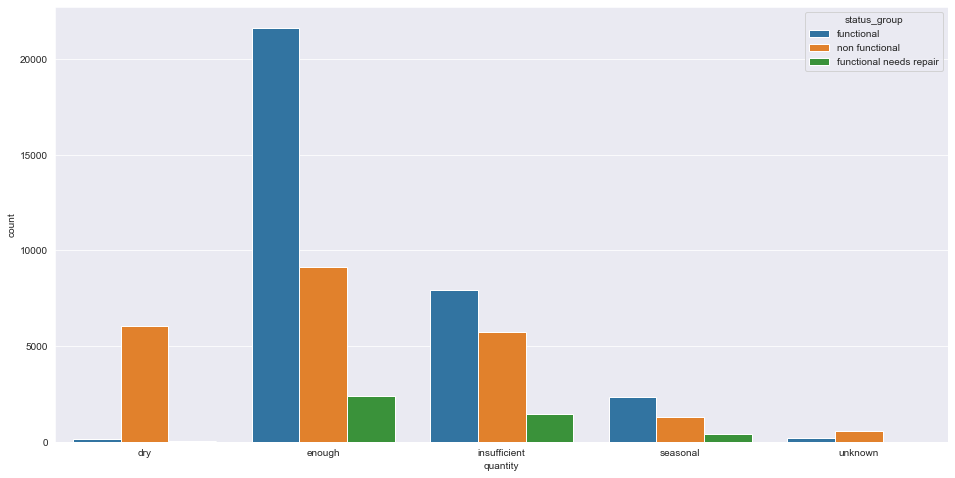

In [104]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='quantity', hue="status_group", data=df_mode)

### Bivariate Analysis

### Relationship between the population and the quantity

Text(0, 0.5, 'Population')

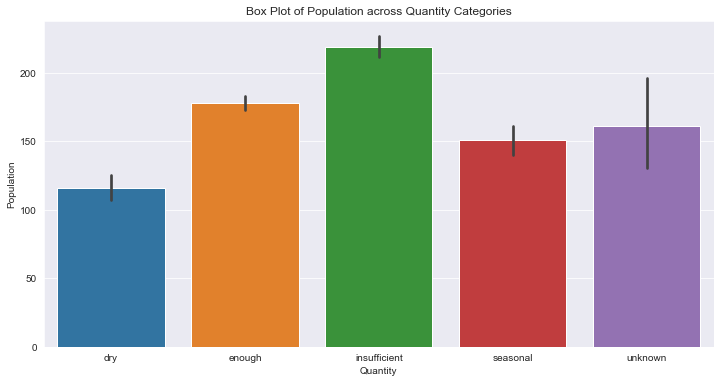

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='population', data=df_mode)
plt.title('Bar Plot of Population and Quantity Categories')
plt.xlabel('Quantity')
plt.ylabel('Population')

Below is a scatterplot of the same.

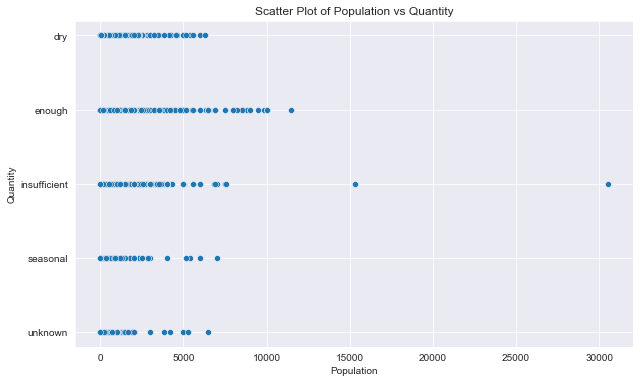

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mode, x='population', y='quantity')
plt.title('Scatter Plot of Population vs Quantity')
plt.xlabel('Population')
plt.ylabel('Quantity')
plt.show()